# EDA of physprop.xlsx

## Summary

1. Experimental logP are 13553 out of total 41039 rows.
2. There are 97% NA values for Temperature. (99% in experimental data)
3. There is no pH column.
3. Most of the molecules are unique. There is only 22 full duplicates in experimental data and 24 rows with equal molecules.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
!conda install --yes --prefix {sys.prefix} xlrd

PHYSPROP_DATA_FILE_PATH = "../data/physprop.xls"

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [8]:
def check_na(df, column):
    n = df.shape[0]
    num_of_na = df[column].isna().sum()
    frac_of_na = int(100.0*(num_of_na / n))
    print("# of NA values " + column + ": " + str(num_of_na) + ", " + str(frac_of_na) + "%")
    print(df[df[column].isna()].head())

In [3]:
physprop_data = pd.read_excel(PHYSPROP_DATA_FILE_PATH)
physprop_data.head()

,CAS #,Formula,Mol Weight,Chemical Name,WS (mg/L),WS_temp,WS_type,WS_reference,LogP,LogP_temp,...,OH (cm3/molecule-sec),OH_temp,OH_type,OH_reference,BP_pressure (mm Hg),MP (deg C),BP (deg C),FP (deg C),SMILES,Unnamed: 33
0,000050-00-0,CH2O,30.026,FORMALDEHYDE,400000.0,20.0,EXP,"PICKRELL,JA ET AL. (1983)",0.35,25.0,...,9.370000e-12,25.0,EXP,"KWOK,ESC & ATKINSON,R (1994)",NaN,-92,-19.1,NaN,O=C,NaN
1,000050-01-1,CH6ClN3,95.532,Guanidine hydrochloride,1000000.0,25.0,EST,"MEYLAN,WM ET AL. (1996)",-3.56,NaN,...,2.100000e-11,25.0,EST,"MEYLAN,WM & HOWARD,PH (1993)",NaN,182.3,NaN,NaN,NC(N)=N(H)(H)Cl,NaN
2,000050-02-2,C22H29FO5,392.470,DEXAMETHASONE,89.0,25.0,EXP,"YALKOWSKY,SH & DANNENFELSER,RM (1992)",1.83,25.0,...,6.950100e-11,25.0,EST,"MEYLAN,WM & HOWARD,PH (1993)",NaN,262,NaN,NaN,C1(=O)C=C2CCC3C4CC(C)C(O)(C(=O)CO)C4(C)CC(O)C3...,NaN
3,000050-03-3,C23H32O6,404.510,HYDROCORTISONE ACETATE,14.1,25.0,EXP,"YALKOWSKY,SH & DANNENFELSER,RM (1992)",2.19,NaN,...,1.128800e-10,25.0,EST,"MEYLAN,WM & HOWARD,PH (1993)",NaN,223 dec,NaN,NaN,C1C(=O)C=C2CCC3C4CCC(O)(C(=O)COC(=O)C)C4(C)CC(...,NaN
4,000050-04-4,C23H30O6,402.490,CORTISONE ACETATE,20.0,25.0,EXP,"YALKOWSKY,SH & DANNENFELSER,RM (1992)",2.10,25.0,...,1.083400e-10,25.0,EST,"MEYLAN,WM & HOWARD,PH (1993)",NaN,222,NaN,NaN,CC(=O)OCC(=O)C3(O)CCC4C2CCC1=CC(=O)CCC1(C)C2C(...,NaN


In [7]:
physprop_data.columns

Index(['CAS #', 'Formula', 'Mol Weight', 'Chemical Name', 'WS (mg/L)',
       'WS_temp', 'WS_type', 'WS_reference', 'LogP', 'LogP_temp', 'LogP_type',
       'LogP_reference', 'VP (mm Hg)', 'VP_temp', 'VP_type', 'VP_reference',
       'DC_pKa', 'DC_temp', 'DC_type', 'DC_reference', 'HL (atm-m3/mole)',
       'HL_temp', 'HL_type', 'HL_reference', 'OH (cm3/molecule-sec)',
       'OH_temp', 'OH_type', 'OH_reference', 'BP_pressure (mm Hg)',
       'MP (deg C)', 'BP (deg C)', 'FP (deg C)', 'SMILES', 'Unnamed: 33'],
      dtype='object')

In [5]:
physprop_logp_data = physprop_data[['LogP', 'LogP_temp', 'LogP_type', 'SMILES']]
physprop_logp_data.head()

,LogP,LogP_temp,LogP_type,SMILES
0,0.35,25.0,EXP,O=C
1,-3.56,NaN,EST,NC(N)=N(H)(H)Cl
2,1.83,25.0,EXP,C1(=O)C=C2CCC3C4CC(C)C(O)(C(=O)CO)C4(C)CC(O)C3...
3,2.19,NaN,EXP,C1C(=O)C=C2CCC3C4CCC(O)(C(=O)COC(=O)C)C4(C)CC(...
4,2.10,25.0,EXP,CC(=O)OCC(=O)C3(O)CCC4C2CCC1=CC(=O)CCC1(C)C2C(...


In [6]:
print(physprop_logp_data.shape)

(41039, 4)


In [9]:
check_na(physprop_logp_data, 'LogP_temp')

# of NA values LogP_temp: 40122, 97%
   LogP  LogP_temp LogP_type  \
1 -3.56        NaN       EST   
3  2.19        NaN       EXP   
5  1.47        NaN       EXP   
6 -0.40        NaN       EXP   
7 -1.60        NaN       EST   

                                              SMILES  
1                                    NC(N)=N(H)(H)Cl  
3  C1C(=O)C=C2CCC3C4CCC(O)(C(=O)COC(=O)C)C4(C)CC(...  
5                     CCC1(C(=O)NC(=O)NC1=O)c2ccccc2  
6  O=C1C(N)=C(C)C(=O)C2=C1C(COC(=O)N)C3(OC)C(N4)C...  
7              O=C1N=C(O[Na])N(C)C(=O)C1(C)C2=CCCCC2  


In [10]:
exp_physprop_logp_data = physprop_logp_data[physprop_logp_data['LogP_type'] == 'EXP']
exp_physprop_logp_data = exp_physprop_logp_data.drop(['LogP_type'], axis=1)
exp_physprop_logp_data.head()

,LogP,LogP_temp,SMILES
0,0.35,25.0,O=C
2,1.83,25.0,C1(=O)C=C2CCC3C4CC(C)C(O)(C(=O)CO)C4(C)CC(O)C3...
3,2.19,NaN,C1C(=O)C=C2CCC3C4CCC(O)(C(=O)COC(=O)C)C4(C)CC(...
4,2.10,25.0,CC(=O)OCC(=O)C3(O)CCC4C2CCC1=CC(=O)CCC1(C)C2C(...
5,1.47,NaN,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2


In [11]:
print(exp_physprop_logp_data.shape)
LOGP_COLUMN = 'LogP'
LOGP_TEMP_COLUMN = 'LogP_temp'
SMILES_COLUMN = 'SMILES'
n = exp_physprop_logp_data.shape[0]

(13553, 3)


In [12]:
check_na(exp_physprop_logp_data, LOGP_COLUMN)

# of NA values LogP: 0, 0%
Empty DataFrame
Columns: [LogP, LogP_temp, SMILES]
Index: []


In [13]:
check_na(exp_physprop_logp_data, LOGP_TEMP_COLUMN)

# of NA values LogP_temp: 13439, 99%
    LogP  LogP_temp                                             SMILES
3   2.19        NaN  C1C(=O)C=C2CCC3C4CCC(O)(C(=O)COC(=O)C)C4(C)CC(...
5   1.47        NaN                     CCC1(C(=O)NC(=O)NC1=O)c2ccccc2
6  -0.40        NaN  O=C1C(N)=C(C)C(=O)C2=C1C(COC(=O)N)C3(OC)C(N4)C...
10  1.69        NaN                       CCC1(NC(=O)N(C)C1=O)c2ccccc2
13  0.63        NaN                          C1CCNP(=O)(N(CCCl)CCCl)O1


In [15]:
exp_physprop_logp_data.duplicated().sum()

22

In [16]:
exp_physprop_logp_data = exp_physprop_logp_data.drop_duplicates()

In [17]:
exp_physprop_logp_data.shape

(13531, 3)

In [19]:
exp_physprop_logp_data[SMILES_COLUMN].unique().size

13397

In [28]:
exp_physprop_logp_data[exp_physprop_logp_data[SMILES_COLUMN].duplicated(keep=False)].groupby(SMILES_COLUMN).count()

,LogP,LogP_temp
SMILES,,
C(=CC)C,2,1
C(=CC=C)C,2,0
C(=CCC(C(=C)C)C1)(C1)C,2,1
C(=CCl)CCl,2,0
C(=CCl)Cl,3,0
C(C(C(C(C1Cl)Cl)Cl)Cl)(C1Cl)Cl,4,0
C(C(CC1C2)C1(C)C)(=C2)C,3,1
C(F)(F)(F)c1ccc2C(C3)CC(N)C3c2c1,2,0
C1(=O)C=C2CCC3C4CCC(O)(C(=O)COC5C(O)C(O)C(O)C(CO)O5)C4(C)CC(O)C3C2(C)C=C1,2,0


In [29]:
exp_physprop_logp_data[exp_physprop_logp_data[SMILES_COLUMN] == "C(C(CC1C2)C1(C)C)(=C2)C"]

,LogP,LogP_temp,SMILES
1160,4.83,25.0,C(C(CC1C2)C1(C)C)(=C2)C
20246,4.48,NaN,C(C(CC1C2)C1(C)C)(=C2)C
20249,4.44,NaN,C(C(CC1C2)C1(C)C)(=C2)C


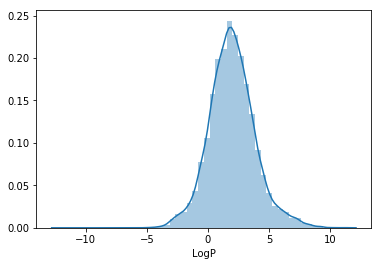

In [31]:
sns.distplot(exp_physprop_logp_data[LOGP_COLUMN])
